In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve, auc
pd.set_option('display.max_columns', None)

In [2]:
hd = pd.read_csv("heart_disease_health_indicators_BRFSS2015 2.csv")

In [3]:
hd.shape

(253680, 22)

In [4]:
hd.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
hd['HeartDiseaseorAttack'].unique()

array([0., 1.])

In [6]:
hd['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [7]:
hd.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
hd.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
hd.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
hd["HeartDiseaseorAttack"].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [11]:
hd["Diabetes"].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64

In [12]:
hd["GenHlth"].value_counts()

2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: GenHlth, dtype: int64

In [13]:
hd["PhysHlth"].value_counts()

0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: PhysHlth, dtype: int64

In [14]:
hd['HighBP']

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
253675    1.0
253676    1.0
253677    0.0
253678    1.0
253679    1.0
Name: HighBP, Length: 253680, dtype: float64

In [15]:
hd['BMI'].mean()

28.382363607694735

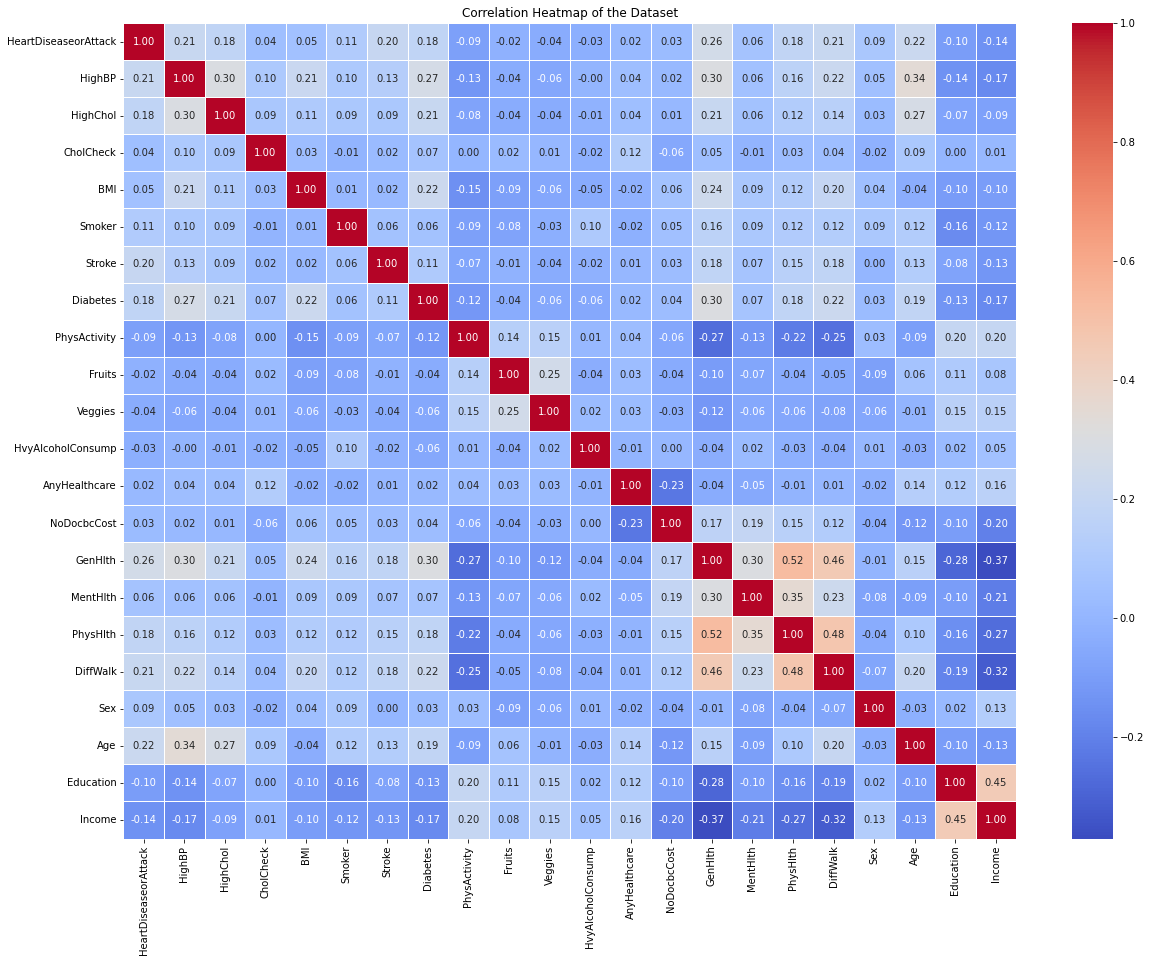

In [16]:
correlation_matrix = hd.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

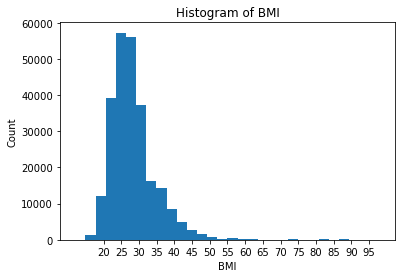

In [17]:
plt.hist(data=hd, x='BMI', bins=30)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title('Histogram of BMI')
plt.xticks(ticks=range(20, 100, 5))
plt.show()

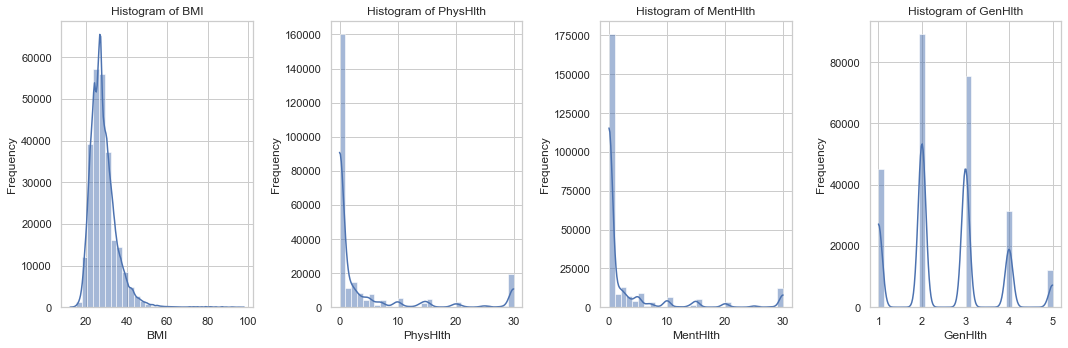

In [18]:
sns.set(style="whitegrid")

# Draw a bar plot of 'HeartDiseaseorAttack' value counts
plt.figure(figsize=(15, 5))

# Histograms for continuous variables
variables = ['BMI', 'PhysHlth', 'MentHlth','GenHlth']

for i, var in enumerate(variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(hd[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

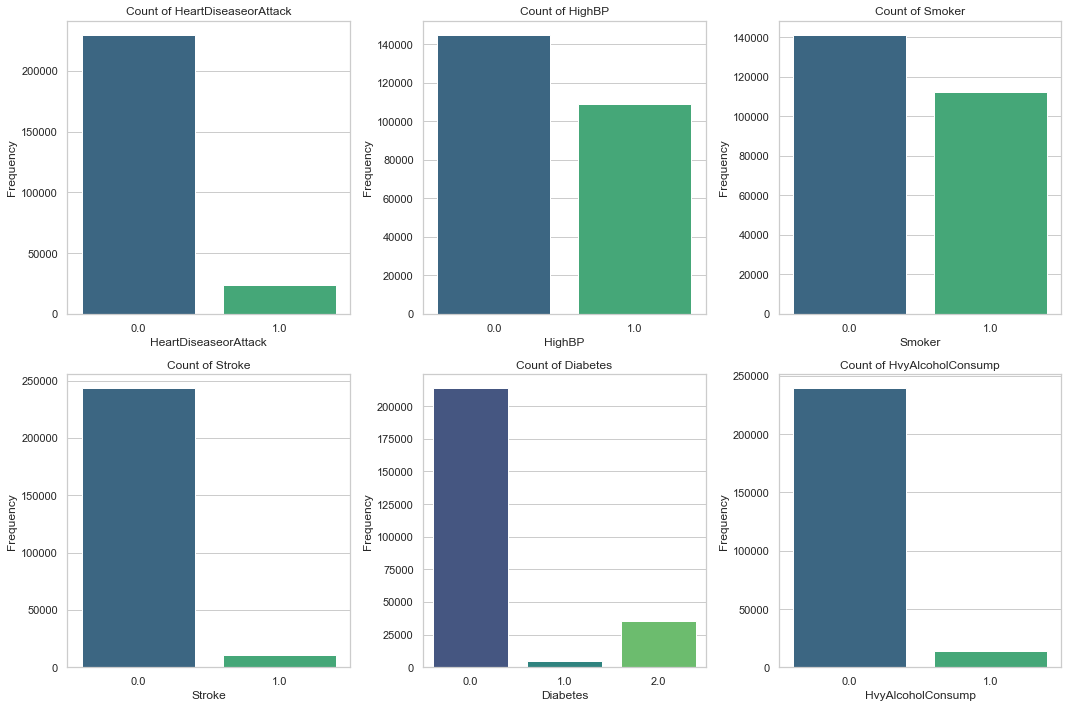

In [19]:
categorical_vars = ['HeartDiseaseorAttack', 'HighBP', 'Smoker', 'Stroke', 'Diabetes', 'HvyAlcoholConsump']

plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=hd, x=var, palette="viridis")
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
features = ["Age","MentHlth", "BMI","PhysHlth", "GenHlth", "Sex", "HighChol", "HighBP", "Stroke", "Smoker", "DiffWalk", "Diabetes", "Income"]

In [21]:
X = hd[features]
y = hd['HeartDiseaseorAttack']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.238814
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               253680
Model:                            Logit   Df Residuals:                   253666
Method:                             MLE   Df Model:                           13
Date:                  Sun, 08 Oct 2023   Pseudo R-squ.:                  0.2349
Time:                          20:10:00   Log-Likelihood:                -60582.
converged:                         True   LL-Null:                       -79178.
Covariance Type:              nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2420      0.066   -109.680      0.000      -7.371      -7.113
Age            0.2524      0.004     71.722      0.000       0.245       0.259
MentHlth       0.0030      0.001      3.075      0.002       0.001       0.005
BMI            0.0010      0.001      0.866      0.387      -0.001       0.003
PhysHlth       0.0014      0.001      1.600      0.110      -0.000       0.003
GenHlth        0.4910      0.009     52.251      0.000       0.473       0.509
Sex            0.7553      0.016     47.469      0.000       0.724       0.786
HighChol       0.6185      0.016     37.648      0.000       0.586       0.651
HighBP         0.5263      0.018     29.703      0.000       0.492       0.561
Stroke         0.9833      0.024     40.270      0.000       0.935       1.031
Smoker         0.3478      0.016     22.282      0.000       0.317       0.378
DiffWalk       0.2961      0.019     15.403      0.000       0.258       0.334
Diabetes       0.1517      0.009     16.938      0.000       0.134       0.169
Income        -0.0444      0.004    -11.511      0.000      -0.052      -0.037
==============================================================================
"""

In [22]:
logistic_model = sm.Logit(y, X).fit()

# Separate data into smokers and non-smokers
smokers_data = hd[hd["Smoker"] == 1]
non_smokers_data = hd[hd["Smoker"] == 0]

# Predict the probabilities using the logistic regression model
smokers_prob_new_model = logistic_model.predict(sm.add_constant(smokers_data[features], has_constant='add'))
non_smokers_prob_new_model = logistic_model.predict(sm.add_constant(non_smokers_data[features], has_constant='add'))

# Calculate the average probability for each group
avg_prob_smokers_new_model = smokers_prob_new_model.mean()
avg_prob_non_smokers_new_model = non_smokers_prob_new_model.mean()

avg_prob_smokers_new_model, avg_prob_non_smokers_new_model

Optimization terminated successfully.
         Current function value: 0.238814
         Iterations 8


(0.13165455467297363, 0.06436495182539699)

In [23]:
poor_mental_health_data = hd[hd["MentHlth"] > 15]
good_mental_health_data = hd[hd["MentHlth"] <= 15]

# Predict the probability for both groups using the logistic regression model
poor_mental_health_prob = logistic_model.predict(sm.add_constant(poor_mental_health_data[features], has_constant='add'))
good_mental_health_prob = logistic_model.predict(sm.add_constant(good_mental_health_data[features], has_constant='add'))

# Calculate the average probability for each group
avg_prob_poor_mental_health = poor_mental_health_prob.mean()
avg_prob_good_mental_health = good_mental_health_prob.mean()

avg_prob_poor_mental_health, avg_prob_good_mental_health

(0.15929827015948692, 0.0892527464478567)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,51.183595
1,Age,1.284755
2,MentHlth,1.224390
3,BMI,1.149947
4,PhysHlth,1.613044
5,GenHlth,1.764617
6,Sex,1.049411
7,HighChol,1.173141
8,HighBP,1.335658
9,Stroke,1.062262


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluate model's performance
accuracy = accuracy_score(y_test, y_prob > 0.5)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

accuracy, roc_auc

(0.9086447492904447, 0.8471083099170826)

In [26]:
coefficients = log_reg.coef_[0]

# Creating a DataFrame to display feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sorting the DataFrame based on the absolute value of coefficients
sorted_feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

sorted_feature_importance

,Feature,Coefficient
1,Age,0.762766
5,GenHlth,0.526828
6,Sex,0.373349
7,HighChol,0.303708
8,HighBP,0.261371
9,Stroke,0.194436
10,Smoker,0.172834
12,Diabetes,0.110550
11,DiffWalk,0.108586
13,Income,-0.093862


In [27]:
# Calculate predicted probabilities for training data
probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute marginal effects for each observation and predictor
marginal_effects_obs = log_reg.coef_ * (probs * (1 - probs))[:, np.newaxis]

# Compute average marginal effects across all observations
average_marginal_effects = np.mean(marginal_effects_obs, axis=0)

# Display average marginal effects
for feature, coef in zip(list(X.columns), average_marginal_effects):
    print(f"{feature}: {coef*100:.2f}")

const: 0.00
Age: 5.28
MentHlth: 0.15
BMI: 0.05
PhysHlth: 0.08
GenHlth: 3.65
Sex: 2.59
HighChol: 2.10
HighBP: 1.81
Stroke: 1.35
Smoker: 1.20
DiffWalk: 0.75
Diabetes: 0.77
Income: -0.65


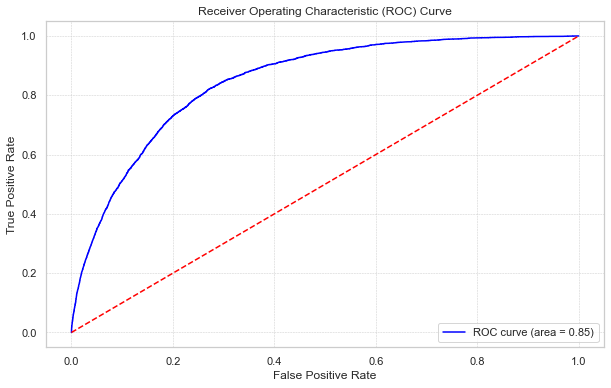

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

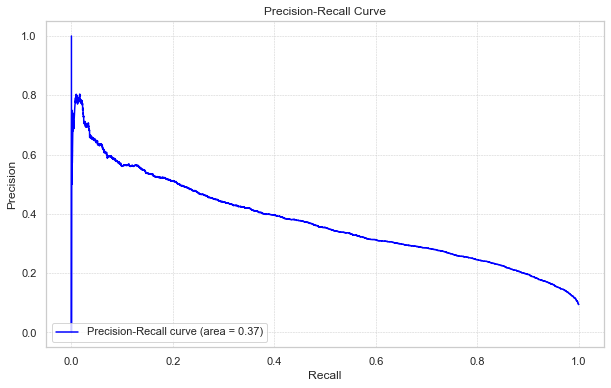

In [29]:
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Compute area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [30]:
idx = np.argmin(np.abs(fpr - 0.40))
selected_threshold = thresholds[idx]

selected_threshold

0.011251806959282766

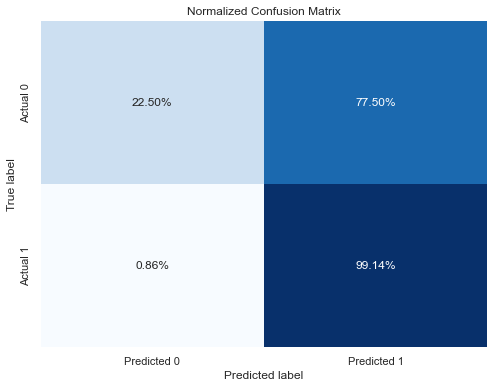

In [31]:
y_pred = (y_prob > selected_threshold).astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
import numpy as np

# Calculate predicted probabilities
hd['predicted_prob'] = result.predict(X)

# Calculate the average predicted probability
mean_prob = hd['predicted_prob'].mean()

# Compute marginal effects for each variable
marginal_effects = {}
for var in features:
    beta = result.params[var]
    me = beta * mean_prob * (1 - mean_prob)
    marginal_effects[var] = me

marg_effects = result.get_margeff()

marg_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
         Logit Marginal Effects        
=======================================
Dep. Variable:     HeartDiseaseorAttack
Method:                            dydx
At:                             overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0175      0.000     71.722      0.000       0.017       0.018
MentHlth       0.0002   6.71e-05      3.074      0.002    7.48e-05       0.000
BMI         7.223e-05   8.34e-05      0.866      0.387   -9.13e-05       0.000
PhysHlth    9.658e-05   6.04e-05      1.600      0.110   -2.17e-05       0.000
GenHlth        0.0340      0.001     52.566      0.000       0.033       0.035
Sex            0.0523      0.001     47.769      0.000       0.050       0.054
HighChol       0.0428      0.001     37.700      0.000       0.041       0.045
HighBP         0.0364      0.001     29.675      0.000       0.034       0.039
Stroke         0.0680      0.002     40.865      0.000       0.065       0.071
Smoker         0.0241      0.001     22.298      0.000       0.022       0.026
DiffWalk       0.0205      0.001     15.426      0.000       0.018       0.023
Diabetes       0.0105      0.001     16.965      0.000       0.009       0.012
Income        -0.0031      0.000    -11.510      0.000      -0.004      -0.003
==============================================================================
"""

In [33]:

from sklearn.metrics import confusion_matrix

# 1. Predict class labels
threshold = 0.5
predictions = (hd['predicted_prob'] >= threshold).astype(int)

# 2. Construct a confusion matrix
matrix = confusion_matrix(hd['HeartDiseaseorAttack'], predictions)

# 3. Calculate percentages
total = matrix.sum()
percentage_matrix = (matrix / total) * 100

print("Confusion Matrix (Counts):\n", matrix)
print("\nConfusion Matrix (Percentages):\n", percentage_matrix)

Confusion Matrix (Counts):
 [[227234   2553]
 [ 20864   3029]]

Confusion Matrix (Percentages):
 [[89.57505519  1.006386  ]
 [ 8.22453485  1.19402397]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_rf = random_forest.predict_proba(X_test_scaled)[:,1]

# Evaluate model's performance
accuracy_rf = accuracy_score(y_test, y_prob_rf > 0.5)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

accuracy_rf, roc_auc_rf

(0.8970947650583412, 0.7963121540488043)

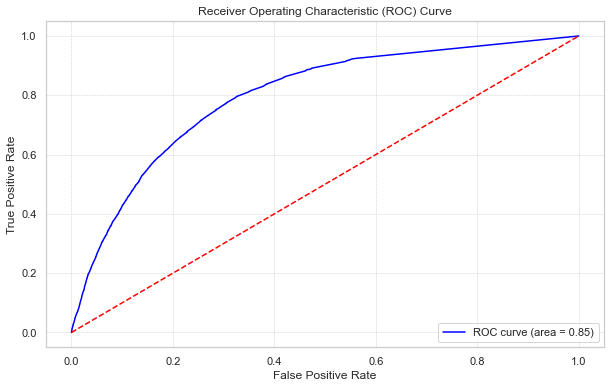

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [36]:
from sklearn.naive_bayes import GaussianNB

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_gnb = gnb.predict_proba(X_test_scaled)[:,1]

# Evaluate model's performance
accuracy_gnb = accuracy_score(y_test, y_prob_gnb > 0.5)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

accuracy_gnb, roc_auc_gnb

(0.837590665405235, 0.816988500499034)

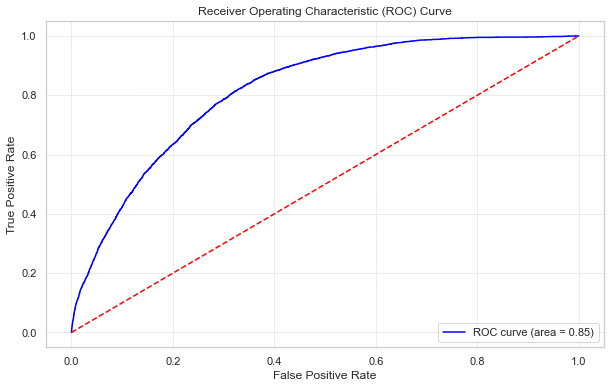

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [38]:
import xgboost as xgb

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:,1]

# Evaluate model's performance
accuracy_xgb = accuracy_score(y_test, y_prob_xgb > 0.5)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

accuracy_xgb, roc_auc_xgb

/Users/mikeblount/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


(0.9077578051087984, 0.8442048981732551)

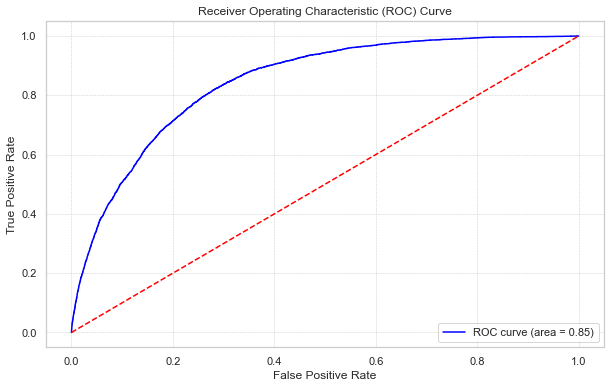

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()